/tmp/ipykernel_3955670/323222765.py:34: RuntimeWarning: overflow encountered in ubyte_scalars
  intensity_diff = (I_i - I_j) ** 2 / (2 * sigma_I ** 2)


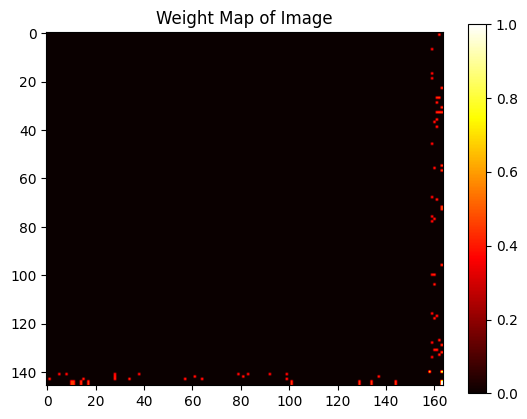

In [8]:
# Importing necessary libraries
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'img/1.jpg'
image = Image.open(image_path).convert('L')  # Convert to grayscale

# Convert image to numpy array
image_array = np.array(image) # / 255.0  # Normalize pixel values to [0, 1]

# Function to calculate Euclidean distance between two points
def euclidean_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

# Define the compute_weight function
def compute_weight(I_i, I_j, dist_ij, sigma_I, sigma_d, r):
    """
    Compute the weight between two pixels based on their intensity and distance.
    
    Args:
        I_i (float): Intensity of pixel i, a value between 0 and 1.
        I_j (float): Intensity of pixel j, a value between 0 and 1.
        dist_ij (float): Euclidean distance between pixel i and j.
        sigma_I (float): Standard deviation for intensity.
        sigma_d (float): Standard deviation for distance.
        r (float): Maximum allowable distance.
    
    Returns:
        float: The computed weight.
    """
    if dist_ij < r:
        intensity_diff = (I_i - I_j) ** 2 / (2 * sigma_I ** 2)
        distance_factor = (dist_ij ** 2) / (2 * sigma_d ** 2)
        weight = np.exp(- (intensity_diff + distance_factor))
        return weight
    else:
        return 0.0

# Parameters
sigma_I = 0.07  # Intensity standard deviation
sigma_d = 8  # Distance standard deviation
r = 11  # Maximum distance

height, width = image_array.shape
weights = np.zeros((height, width))

# Iterate over the image pixels
for i in range(height):
    for j in range(width):
        for x in range(max(0, i - r), min(height, i + r)):
            for y in range(max(0, j - r), min(width, j + r)):
                dist = euclidean_distance((i, j), (x, y))
                #if dist < r:
                weights[i, j] = compute_weight(image_array[i, j], image_array[x, y], dist, sigma_I, sigma_d, r)

# Show the result as a visual map of weights
plt.imshow(weights, cmap='hot')
plt.colorbar()
plt.title('Weight Map of Image')
plt.show()


In [6]:
image_array

array([[119, 121, 122, ..., 125, 123, 121],
       [120, 121, 121, ..., 122, 121, 120],
       [121, 121, 119, ..., 117, 116, 116],
       ...,
       [122, 118, 114, ..., 112, 112, 113],
       [122, 122, 114, ..., 128, 116, 118],
       [122, 122, 114, ..., 128, 116, 118]], dtype=uint8)

In [9]:
weights

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.14472826e-45, 4.54270474e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 4.43747310e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 9.92217938e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])